# Métodos baseados em árvores

## 8.1 Introdução a árvores de decisões 

Árvores de decisão podem ser aplicadas a ambos os problemas de regressão e classificação. Primeiramente consideraremos problemas de regressão, e então partiremos para os de classificação.

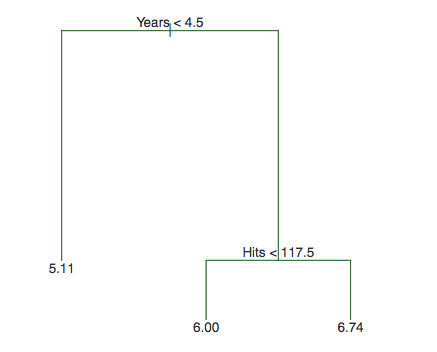
<h5>Figura 8.1.</h5>
<i> Para os dados $Rebatedores$, uma árvore de regressão para a predição do salário registrado de um jogador de baseball, baseado no número de anos que ele jogou em ligas maiores e em seu número de acertos no ano anterior. Em um dado nó interno, a legenda (da forma $X_{j}$ < $t_{k}$ ) indica o ramo do lado esquerdo emanando desta divisão, e o ramo direito corresponde a $X_{j}$ $≥$ $t_{k}$. Por exemplo, a divisão no topo da árvore resulta em dois grandes ramos. O ramo esquerdo corresponde a $Anos$ < 4,5, e o ramo esquerdo corresponde a $Anos$ ≥ 4,5. A árvore possui dois nós internos e três nós terminais, ou folhas. O número em cada folha é a média da resposta para as observações que caem na mesma. 

## 8.1.1. Árvores de regressão

Para estudarmos $árvores$ $de$ $regressão$, começaremos com um simples exemplo.

### Predizendo o salário de jogadores de baseball usando árvores de regressão

Usaremos o conjunto de dados $Rebatedores$ para prever o salário de um jogador de baseball baseado em $Anos$ (o número de anos em que um jogador jogou nas maiores ligas) e $Acertos$ (o número de acertos que ele fez no ano anterior). Primeiramente, removemos observações que faltam nos valores de $Salário$, e fazemos uma transformação logarítmica em $Salário$ para que sua distribuição possua uma típica forma de sino. (Relembre que $Salário$ é medido em milhares de dólares). 

A figura 8.1. mostra um ajuste com árvore de regressão para estes dados, que consiste de uma série de regras de divisão, iniciando no topo da árvore. A divisão de cima atribui observações ao ramo esquerdo de $Anos$ < 4.5. O salário previsto para estes jogadores é dado pela média do valor de resposta para os jogadores no conjunto de dados com $Anos$ < 4.5. Para tais jogadores, a média do salário logarítmico é 5,107, e então temos uma predição de $e^{5,107 }$ milhares de dólares, por exemplo, 165.174 dólares, para estes jogadores. Jogadores com $Anos$ ≥ 4,5 são atribuídos ao ramo direito, e posteriormente este grupo é subdividido em $Acertos$. 

Em geral, a árvore estratifica/segmenta os jogadores em três regiões do espaço preditor: jogadores que jogaram por 4 ou menos anos, jogadores que jogaram por cinco ou mais anos e jogadores que fizeram no mínimo 118 acertos no ano anterior. Estas regiões podem ser escritas como $R_{1}$ = {$X$| $Anos$ < 4,5}, $R_{2}$ = {$X$ | $Anos$ ≥ 4,5, $Acertos$ < 117,5} e $R_{3}$ = {$X$ | $Anos$ ≥ 4,5, $Acertos$ ≥ 117,5}. A figura 8.2. ilustra as regiões como uma função de $Anos$ e $Acertos$. Os salários previstos para estes três grupos são 1000 $.$ $e^{5,107}$ = 165.174, 1000 $.$ $e^{5,999}$ = 402.834 e 1000 $.$ $e^{6,740}$ = 845.346, respectivamente. 

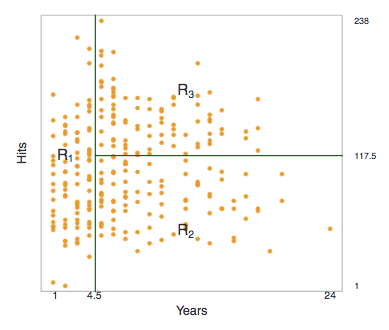
<h5> Figura 8.2.</h5>
<i> As partições das regiões da árvore para o conjunto de dados $Rebatedores$ da árvore de regressão ilustrada na Figura 8.1.</i>

Mantendo a analogia da $árvore$, as regiões $R_{1}$, $R_{2}$ e $R_{3}$ são conhecidas como $nós$ $terminais$ ou $folhas$ da árvore. Como é o caso para a figura 8.1, árvores de decisões são tipicamentes desenhadas de $cabeça$ $para$ $baixo$, no sentido de que as folhas estão nas partes mais inferiores da árvore. Na figura 8.1, os dois nós internos são indicados pelos textos $Anos < 4.5$ e $Acertos$ < 117,5. Nos referimos aos segmentos das árvores que conectam os nós como $ramos$. 

Poderíamos interpretar a árvore de regressão mostrada na figura 8.1. da seguinte forma: $Anos$ é o fator mais importante na determinação do $Salário$, e jogadores com menos experiência ganham menos que jogadores mais experientes. Dado que um jogador é menos experiente, seu número de acertos no ano anterior parece ter um papel pequeno em seu salário. Mas, entre jogadores que estiveram jogando em ligas maiores por 5 ou mais anos, o número de acertos feito no ano anterior de fato afeta o salário, e jogadores que obtiveram mais acertos no último ano tendem a ter salários mais altos. A árvore de regressão mostrada na Figura 8.1 é provavelmente uma grande simplificação da verdadeira relação entre $Acertos$, $Anos$, e $Salário$. No entanto, ela possui vantagens sobre outros tipos de modelo de regressão: é mais facilmente interpretável e possui uma boa representação gráfica.

### Predição pela estratificação do espaço de recurso

Discutiremos agora o processo de construção de uma árvore de regressão. De grosso modo, há duas etapas:

<b>1.</b> <i>Dividimos o espaço de recurso - isto é, o conjunto dos valores possíveis para $X_{1}$,$X_{2}$,...,$X_{p}$ - em $J$ regiões distintas e não-sobrepostas, $R_{1}$, $R_{2}$,...,$R_{J}$.</i>
<br></br>
<br></br>
<b>2.</b> <i>Para toda observação que cai na região $R_{j}$, fazemos a mesma predição, a qual é simplesmente a média dos valores de resposta para as observações de treino em $R_{j}$.</i>

Por exemplo, suponha que no passo 1 obtenhamos duas regiões, $R_{1}$ e $R_{2}$, e que a média da resposta das observações de treino na primeira região seja 10, enquanto a média da resposta das observações de treino na segunda região seja 20. Então, para uma dada observação $X$ = $x$, se $x$ $∈$ $R_{1}$, iremos predizer um valor 10, e se $x$ $∈$ $R_{2}$ iremos predizer um valor 20.

Agora elaboraremos o passo 1. Como nós construímos as regiões $R_{1}$,...,$R_{J}$? Em teoria, as regiões poderiam ter qualquer forma. No entanto, escolhemos dividir o espaço preditor em retângulos de altas dimensões, ou $caixas$, por simplicidade e para facilitar a interpretação dos modelos preditivos resultantes. O objetivo é encontrar caixas $R_{1}$,...,$R_{j}$ que minimizem o RSS, dado por: 

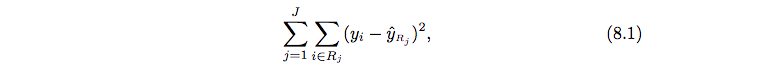

onde $\hat{y}$$_{R_{j}}$ é a média da resposta para as observações de treino até a j-ésima caixa. Infelizmente, é computacionalmente inviável considerar toda partição possível do espaço de recurso em $J$ caixas. Por esta razão, utilizamos uma abordagem mais ganaciosa e $top-down$, conhecida como $divisão$ $binária$ $recursiva$. A abordagem é $top-down$ porque começa no topo da árvore (neste ponto todas as observações pertencem a uma única região) e então sucessivamente divide o espaço de recurso; cada divisão é indicada por dois novos ramos abaixo na árvore, e é gananciosa porque, em cada etapa do processo de construção da árvore, a $melhor$ divisão é feita naquela etapa em particular, em vez de ir adiante e escolher uma divisão que levará a uma melhor árvore em uma etapa futura.

Para a realização da divisão binária recursiva, primeiro selecionamos o preditor $X_{j}$ e o ponto de corte $s$ tal que a divisão do espaço de recurso nas regiões {$X$|$X_{j}$ < $s$} e {$X$|$X_{j}$ ≥ $s$} leva a maior redução possível no RSS (<i>soma dos quadrados dos erros residuais</i>). (A notação {$X$|$X_{j}$ < $s$} significa <i>a região do espaço de recurso na qual $X_{j}$ possui um valor menor que s.</i>) Isto é, consideramos todos os preditores $X_{1}$,...,$X_{p}$ e todos os valores possíveis do ponto de corte $s$ para cada um dos preditores, e então escolhemos o preditor e escolhemos um ponto de corte tal que a árvore resultante tenha o menor RSS. Em maiores detalhes, para quaisquer $j$ e $s$, definimos o par de semi-planos

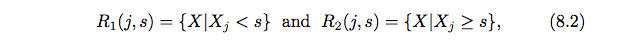

e procuramos o valor de $j$ e $s$ que minimize a equação

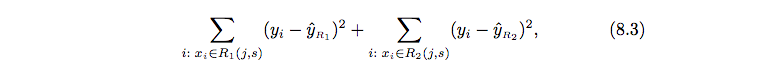

onde $\hat{y}$$_{R_{1}}$ é a média da resposta para as observações de treino em $R_{1}$($j$,$s$), e $\hat{y}$$_{R_{2}}$ é a média da resposta para os observações de treino em $R_{2}$($j$,$s$). Pode-se encontrar os valores de $j$ e $s$ que minimizam $(8.3)$ rapidamente, especialmente quando o número de recursos $p$ não é muito grande. 

Em seguida, repetimos o processo, procurando pelo melhor preditor e o melhor ponto de corte para dividir os dados posteriormente, tal que o RSS seja minimizado em cada uma das regiões resultantes. Agora, temos três regiões. Novamente, procuramos dividir uma das três regiões futuramente, tal que o RSS seja minimizado. O processo continua até que um critério de parada seja alcançado; por exemplo, podemos continuar até que nenhuma região contenha mais que cinco observações. 

Uma vez que as regiões $R_{1}$,...,$R_{J}$ foram criadas, predizemos a resposta para uma dada observação de teste utilizando a média das observações de treino na região a qual a observação de teste pertence. Uma exemplo de região quíntupla é mostrada na figura 8.3. 

### Poda da árvore

O processo descrito acima pode produzir boas predições no conjunto de treino, mas provavelmente sobreajustará os dados, levando a uma performance ruim do conjunto de teste. Isto acontece porque a árvore resultante pode ser muito complexa. Uma árvore menor com um número menor de divisões (isto é, um número menor de regiões $R_{1}$,...,$R_{J}$) podem resultar em uma menor variância e uma melhor interpretação a custo de um pequeno aumento na polarização. Uma alternativa possível para o processo descrito acima é construir a árvore de forma que ela cresça até que a diminuição no RSS devido à cada divisão exceda algum limite (alto). Esta estratégia resultará em árvores menores, mesmo possuindo pouca visão, já que uma divisão aparentemente sem utilidade no início da árvore pode ser seguida por uma divisão muito boa - isto é, uma divisão que leva a uma grande redução do RSS futuramente.

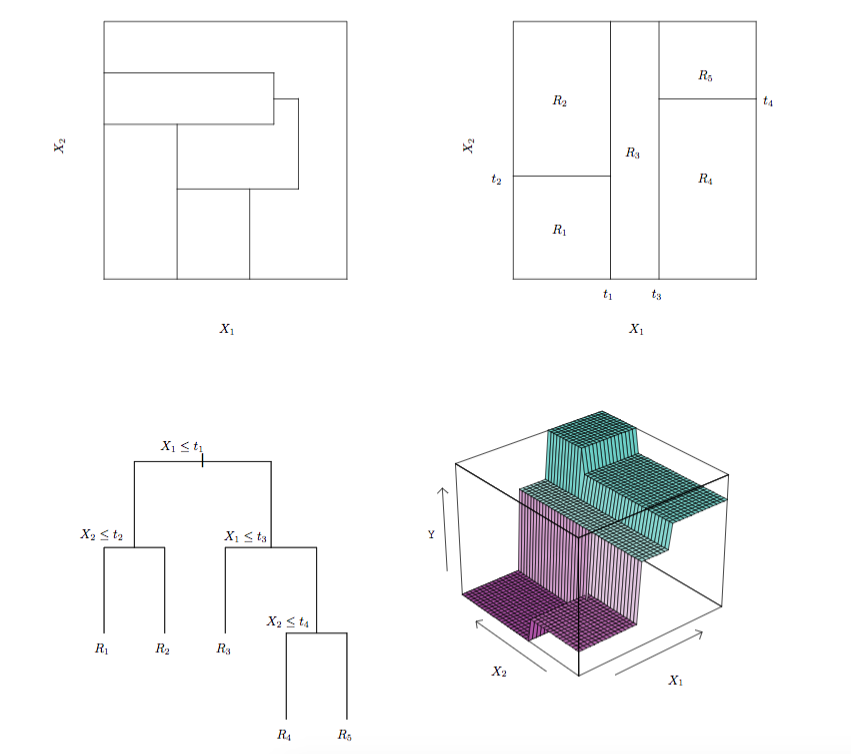
<h5>Figura 8.3. </h5>
Acima, à esquerda: <i>uma partição do espaço de recurso bidimensional que poderia não resultar de uma divisão binária recursiva.</i> Acima, à direita: <i> A saída da divisão binária recursiva em um exemplo bidimensional.</i> Abaixo, à esquerda: <i> Uma árvore correspondente à partição na parte de cima, à direita.</i> Abaixo, à direita: <i> um gráfico em perspectiva da superfície de predição correspondente àquela árvore. </i>

Portanto, uma estratégia melhor é criar uma árvore $T_{0}$ muito grande, e então $podá-la$ de volta de forma que se obtenha uma $subárvore$. Como determinamos a melhor forma de podar a árvore? Intuitivamente, nosso objetivo é selecionar uma subárvore que resulte na menor taxa de erro de teste. Dada uma subárvore, podemos estimar seu erro de teste utilizando validação cruzada ou a abordagem de validação do conjunto. No entanto, estimar a validação cruzada para todas as subárvores possíveis seria bastante incômodo, já que existe um número extremamente grande de possíveis subárvores. Em vez disso, precismos de uma forma de selecionar um pequeno conjunto de subárvores para consideração.

A poda por custo de complexidade - também conhecida como a poda do elo mais fraco - nos dá uma forma de fazer isto. Em vez de considerar todas as subárvores possíveis, consideramos uma sequência de árvores indexadas por um parâmetro de afinação não-negativo $α$.

Para cada valor de $α$ há uma subárvore correspondente $T$ $⊂$ $T_{0}$ tal que 

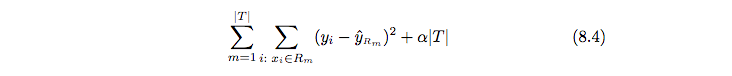

é o menor possível. Aqui, $|T|$ indica o número de nós terminais da árvore $T$, $R_{m}$ é o retângulo (por exemplo, o subconjunto do espaço de recurso) correspondente ao m-ésimo nó terminal, e $\hat{y}$$_{R_{m}}$ é a resposta predita associada a $R_{m}$ - isto é, a média das observações de treino em $R_{m}$. O parâmetro de afinação $α$ controla um trade-off entre a complexidade da subárvore e seu ajuste aos dados de treino. Quando $α$ = 0, então a subárvore $T$ será simplesmente igual à $T_{0}$, porque então (8.4) apenas mede o erro de treino. No entanto, à medida que $α$ aumenta, há um preço a pagar por existir uma árvore com muitos nós terminais, e então a quantidade (8.4) tenderá a ser minimizada por uma subárvore menor.

Portanto, à medida que aumentamos $α$ partindo de $0$ em (8.4), os ramos são podados da árvore de uma forma aninhada e previsível, então a obtenção da sequência inteira de subárvores como uma função de $α$ é fácil. Podemos selecionar um valor de $α$  utilizando um conjunto de validação ou utilizando validação cruzada. Então, nós retornamos para o conjunto de dados completo e obtemos a subárvore correspondente a $α$. Este processo está resumido no algoritmo 8.1.

#### Algoritmo 8.1 <i>Construindo uma árvore de regressão</i>

<b>1.</b> Utilize divisão recursiva binária para criar uma árvore grande nos dados de treino, parando apenas quando cada nó terminal possuir um número menor que algum número mínimo de observações.
<br></br>
<br></br>
<b>2.</b> Aplique a poda por custo de complexidade para a árvore grande para que seja obtida uma sequência das melhores subárvores, como função de $α$.
<br></br>
<br></br>
<b>3.</b> Utilize o método de validação cruzada K-fold para escolher $α$. Isto é, divida as observações de treino em $K$ dobras. Para cada $k$ = $1,...,K$:
<br/br>
<b>(a)</b><i> Repita as etapas 1 e 2 em todas menos a k-ésima dobra dos dados de treino.</i>
<br></br>
<b>(b)</b><i> Avalie o erro de predição quadrático médio nos dados da k-ésima dobra restante, como função de $α$.</i>
<br></br>
<br></br>
Faça a média dos resultados para cada valor de $α$, e escolha um $α$ que minimize o erro médio. 
<br></br>
<br></br>
<b>4.</b> Retorne a subárvore da etapa 2 que corresponde ao valor escolhido de $α$. 
<br></br>
<br></br>

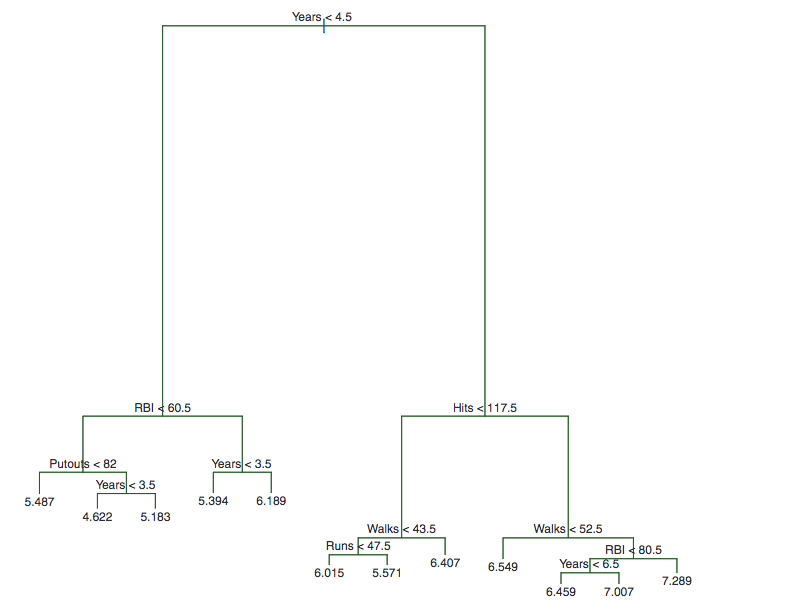

<h5>Figura 8.4.</h5>
<i>Análise da árvore de regressão para os dados $Rebatedores$. A árvore não-podada que resulta em uma divisão top-down gananciosa nos dados de treino é mostrada.</i>

As figuras 8.4 e 8.5 mostram os resultados do ajuste e poda de uma árvore de regressão nos dados $Rebatedores$, utilizando nove dos recursos. Primeiramente, dividimos aleatoriamente o conjunto de dados em duas metades, produzindo 132 observações no conjunto de treino e 131 observações no conjunto de teste. Quando então construímos uma árvore de regressão grande nos dados de treino e variamos $α$ em (8.4) para que críassemos subárvores com números diferentes de nós terminais. Finalmente, realizamos validação cruzada de 6 dobras para que estimássemos o MSE de validação cruzada das árvores como uma função de $α$. (Escolhemos realizar validação cruzada de 6 dobras, pois 132 é um múltiplo exato de 6). A árvore de regressão não-podada é mostrada na figura 8.4. A curva verde na figura 8.5 mostra o erro do coeficiente de variação como uma função do número de folhas, enquanto a curva laranja indica o erro de teste. Foram mostradas também barras de erro ao redor de erros estimados. Para referência, a curva de erro de treino é mostrada em preto. O erro do coeficiente de variação é uma aproximação razoável do erro de teste: o erro do coeficiente de variação assume seu mínimo para uma árvore de três nós, enquanto o erro de teste também cai na árvore com três nós (apesar de assumir seu menor valor na árvore de 10 nós). A árvore podada contendo três nós terminais é mostrada na figura 8.1.

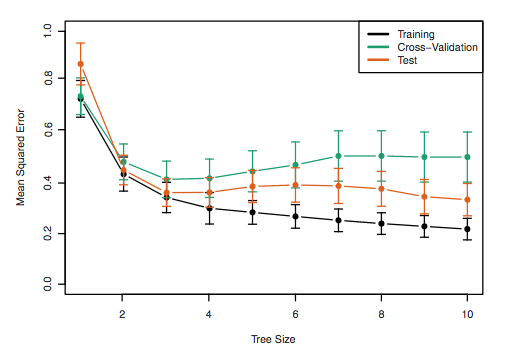
<h5>Figura 8.5.</h5>
<i>Análise de árvore de regressão para os dados $Rebatedores$. Os MSE de treino, validação cruzada e teste são mostrados como uma função do número de nós terminais na árvore podada. As faixas de erro padrão são mostradas. O erro mínimo de validação cruzada ocorre em uma árvore de tamanho 3. 

## 8.1.2  Árvores de classificação

Uma $árvore$ $de$ $classificação$ é bastante similar à uma árvore de regressão, com a diferença que é utilizada para predizer uma resposta qualitativa em vez de uma quantitativa. Relembre que, para uma árvore de regressão, a resposta predita para uma observação é dada pela resposta média das observações de treino que pertencem ao mesmo nó terminal. Em contraste, para uma árvore de classificação, predizemos que cada observação pertence à $classe$ $mais$ $recorrente$ de observações de treino na região a qual pertence. Ao interpretar os resultados de uma árvore de classificação, estamos frequentemente interessados não apenas na predição da classe correspondente a uma região particular de nó um terminal, mas também nas $proporções$ $de$ $classe$ ao longo das observações de treino que caem dentro da região.

A tarefa de crescer uma árvore de classificação é bem similar à tarefa de crescer uma árvore de regressão. Como no contexto da regressão, utilizamos divisão recursiva binária para crescer uma árvore de classificação. No entanto, no contexto de classificação, o RSS não pode ser utilizado como critério para criar as divisões binárias. Uma alternativa natural para o RSS é a $taxa$ de $erro$ $de$ $classificação$. Como planejamos atribuir uma observação em uma dada região à $classe$ $mais$ $recorrente$ de observações de treino naquela região, a taxa de erro de classificação é simplesmente a fração de observações de treino naquela região que não pertencem à classe mais comum:

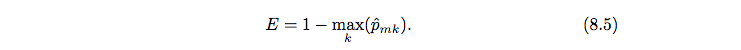

Aqui, $\hat{p}$$_{mk}$ representa a proporção de observações de treino na m-ésima região que são da k-ésima classe. No entanto, o erro de classificação não é suficientemente sensível para o crescimento de árvores, e na prática duas outras medidas são preferíveis.

O $Índice$ $de$ $Gini$ é definido por

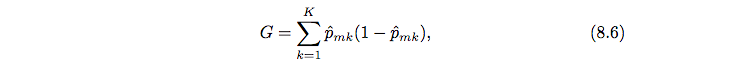

uma medida da variância total ao longo das $K$ classes. Não é difícil ver que o índice de Gini assume um valor pequeno se todos os $\hat{p}$$_{mk}$'s estão próximos a zero ou um. Por esta razão, o índice de Gini é referido como a medida da $pureza$ do nó - um valor pequeno indica que um nó contém predominantemente observações de uma única classe.

Uma alternativa ao índice de Gini é a $entropia$, dada por: 

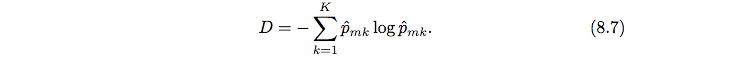

Dado que $0$ &le;$\hat{p}$$_{mk}$&le; $1$, segue que $0$ &le;-$\hat{p}$$_{mk}$$log$($\hat{p}$$_{mk}$). Pode-se mostrar que a entropia assumirá um valor próximo à zero se todos os $\hat{p}$$_{mk}$'s estão próximos a zero ou a um. Portanto, como o índice de Gini, a entropia assumirá um valor pequeno se o m-ésimo nó for puro. Em fato, o índice de Gini e a entropia são bem similares numericamente.

Ao construir uma árvore de classificação, o índice de Gini ou a entropia são tipicamente utilizados para avaliar a qualidade de uma divisão em particular, já que estas duas abordagens são mais sensíveis à pureza do nó do que a taxa de erro de classificação. Qualquer uma destas três abordagens poderiam ser utilizadas ao $podar$ a árvore, mas a taxa de erro de classificação é preferível se a acurácia da predição da árvore final podada for o objetivo. 

A figura 8.6. mostra um exemplo do conjunto de dados $Heart$. Estes dados contêm um resultado $HD$ para 303 pacientes que apresentaram dor no peito. Um resultado positivo ($Sim$) indica a presença de doença no coração baseado em um teste angiográfico, enquanto $Não$ significa ausência de doença no coração. Há 13 preditores, inclusindo $Age$, $Sex$, $Chol$ (uma medida do colesterol), e outras medidas de função do coração e pulmão. A validação cruzada resulta em uma árvore com seis nós terminais. 

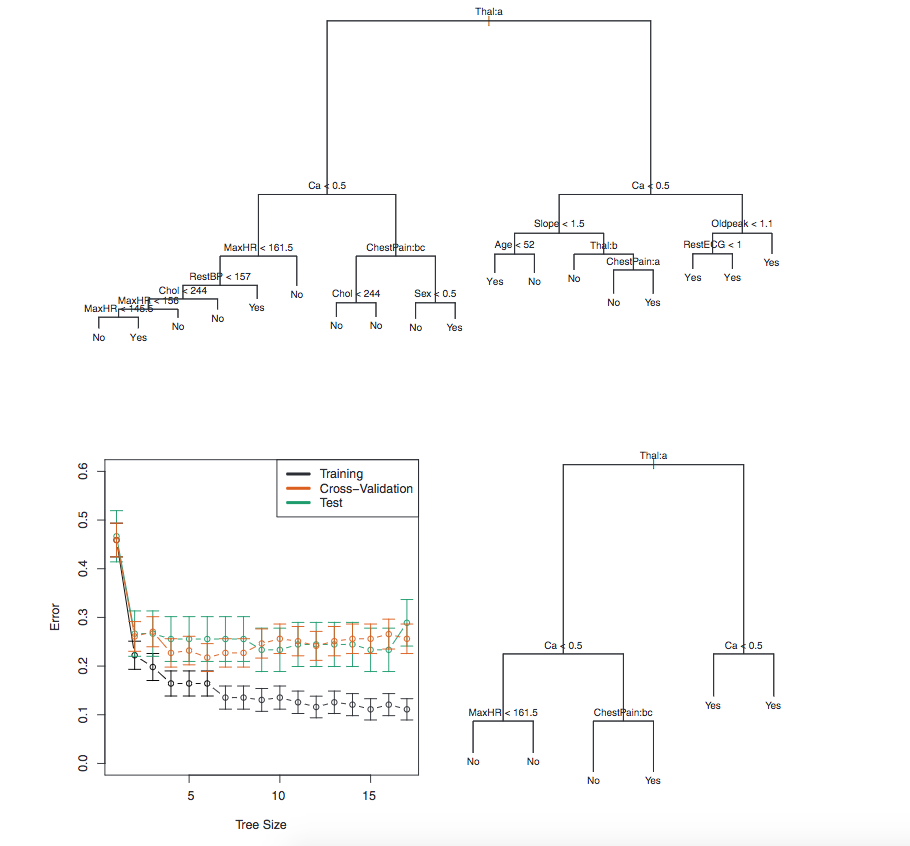
<h5> Figura 8.6. </h5>
<i>Dados</i> $Coração$. Acima: <i>A árvore não-podada</i>. Abaixo, à esquerda: <i>Erro de validação cruzada, de treino e de teste, para tamanhos diferentes da árvore podada.</i> Abaixo, à direita: <i> A árvore podada correspondente ao erro de validação cruzada mínimo.</i>

Em nossa discussão, até agora, assumimos que as variáveis preditivas assumem valores contínuos. No entanto, árvores de decisão podem ser construídas até na presença de variáveis preditivas qualitativas. Por exemplo, nos dados $Heart$, alguns dos preditores, tal como $Sex$, $Thal$ (teste de pressão de Thallium), e $ChestPain$, são qualitativos. Portanto, uma divisão em uma dessas variáveis equivale a atribuir alguns dos valores qualitativos a um ramo e atribuir os valores restantes ao outro ramo. Na figura 8.6., alguns dos nós internos correspondem à divisão de variáveis qualitativas. Por exemplo, o nó interno no topo corresponde à divisão de $Thal$. O texto $Thal:a$ indica que o ramo à esquerda saindo do nó consiste de observações com o primeiro valor da variável $Thal$ (normal), e o nó à direita consiste das observações restantes (falhas consertadas ou reversíveis). O texto $ChestPain:bc$ indica que o ramo à esquerda saindo do nó consiste das observações com os segundos e terceiros valores da variável $ChestPain$, onde os possíveis valores são angina típico, angina atípico, nor não-anginal, e assintomático. 

A figura 8.6. possui uma característica surpreendente: algumas das divisões retornam dois nós terminais que possuem o mesmo valor predito. Por exemplo, considere a divisão $RestECG$ < 1 próxima ao ponto mais baixo à direita da árvore não podada. Independentemente do valor de $RestECG$, um valor de resposta de $Sim$ é predito para estas observações. Por que, então, a divisão é realizada? A divisão é realizada porque leva ao aumento da $pureza$ $do$ $nó$. Isto é, todas as 9 observações correspondentes à folha do lado direito possuem um valor de resposta de Sim, enquanto <sup>$7$</sup>&frasl;<sub>$11$</sub> dos correspondente à folha do lado esquerdo possuem um valor de resposta de $Sim$. Porque a pureza do nó é importante? Suponha que tenhamos uma observação de teste que pertence à região dada pela folha à direita. Então, podemos estar certos de que seu valor de resposta é $Sim$. Em contraste, se uma observação de teste pertence à região dada pela folha à esquerda, então seu valor de resposta é provavelmente $Sim$, mas temos muito menos certeza. Mesmo que a divisão $RestECG<1$ não reduza o erro de classificação, o índice de Gini e a entropia são melhoradas, pois são mais sensíveis à pureza do nó.

## 8.1.3  Árvores versus modelos lineares

Árvores de regressão e de classificação possuem uma forma muito diferente das abordagens clássicas para regressão e classificação apresentadas anteriormente. Em particular, a regressão linear assume um modelo da forma

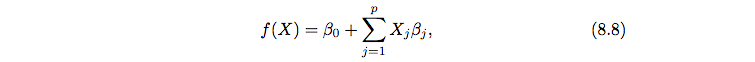

enquanto as árvores de regressão assumem um modelo da forma

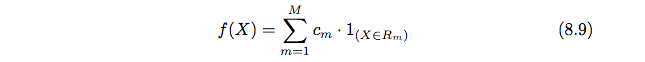

onde $R_{1}$,...,$R_{M}$ representam uma partição do espaço de recurso, como na figura 8.3. 

Qual modelo é melhor? Isso depende do problema com que estamos lidando. Se a relação entre os recursos e as respostas é bem aproximada por um modelo linear como em (8.8), então uma abordagem como a regressão linear provavelmente trabalhará bem, e será melhor do que um método como a árvore de regressão que não explora esta estrutura linear. Se, em vez disso, houver uma relação altamente não-linear e complexa entre os recursos e as respostas como indicado pelo modelo (8.9), então árvores de decisão podem ser melhores que abordagens clássicas. Um exemplo ilustrativo é mostrado na Figura 8.7. As performances relativas de abordagem clássicas e baseadas em árvores podem ser avaliadas pela estimação do erro de teste, utilizando validação cruzada ou a abordagem do conjunto de validação. 

Obviamente, outras considerações além do erro de teste podem participar da seleção de um método de aprendizado estatístico; por exemplo, em certos contextos, a predição utilizando uma árvore pode ser preferida por motivos de interpretabilidade e visualização. 

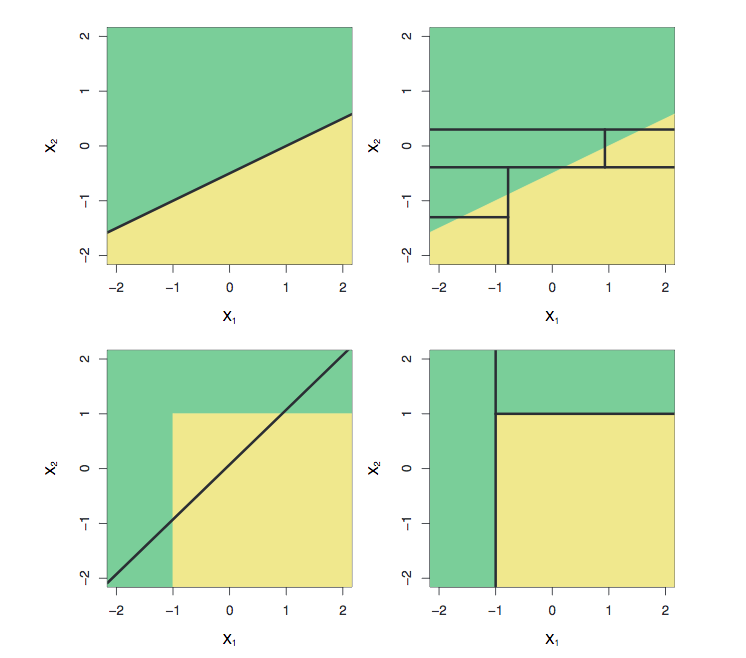
<h5> Figura 8.7. </h5>
Linha acima: <i>Um exemplo de classificação bidimensional na qual a verdadeira fronteira de decisão é linear, e é indicada pelas regiões sombreadas. Uma abordagem clássica que assume uma fronteira linear (à esquerda) terá uma performance melhor que uma árvore de decisão que performa divisões paralelamente aos eixos (à direita).</i> Linha abaixo: <i> Aqui, a verdadeira fronteira de decisão é não-linear. Neste caso, um modelo linear não será capaz de capturar a verdadeira fronteira de decisão (à esquerda), enquanto uma árvore de decisão é bem-sucedida (à direita).</i>

## 8.1.4  Vantagens e desvantagens das árvores

Árvores de decisão para regressão e classificação possuem vantagens sobre as abordagens mais clássicas.

<b>VANTAGENS</b>

<b>1.</b> <i>Árvores são muito fáceis de explicar às pessoas. De fato, elas são até mais fáceis de explicar que regressão linear!</i>
<br></br>
<br></br>
<b>2.</b> <i>Algumas pessoas acreditam que árvores de decisão espelham de forma mais próxima as tomadas de decisões humanas do que as abordagens de regressão e classificação vistas em capítulos anteriores.</i>
<br></br>
<br></br>
<b>3.</b> <i>Árvores podem ser mostradas graficamente, e são facilmente interpretadas até por não-especialistas (especificamente se elas são pequenas).</i>
<br></br>
<br></br>
<b>4.</b> <i>Árvores podem lidar facilmente com preditores qualitativos sem a necessidade de criar variáveis dummy.</i>

<b>DESVANTAGENS</b>

<b>1.</b> <i>Infelizmente, árvores em geral não possuem o mesmo nível de acurácia preditiva de outras abordagens de regressão e classificação.</i>
<br></br>
<br></br>
<b>2.</b> <i>Ademais, árvores podem ser bastante não-robustas. Em outras palavras, uma pequena mudança nos dados pode causar uma grande mudança na árvore estimada final.</i>

No entanto, ao agregar muitas árvores de decisão, utilizando métodos como $bagging$, $random$ $forests$, e $boosting$, a performance preditiva das árvores pode ser substancialmente melhorada. 

## 8.2 Bagging, Random Forests, Boosting

Bagging, random forests e boosting utilizam árvores como blocos de construção para construir modelos de predição mais poderosos.

## 8.2.1 Bagging

O bootstrap, introduzido no capítulo 5, é uma ideia extremamente poderosa. É utilizada em muitas situações na qual é difícil ou até impossível computar diretamente o desvio padrão de uma quantidade de interesse. Nós vimos aqui que o bootstrap pode ser utilizado em um contexto completamente diferente, com o objetivo de melhorar métodos de aprendizado estatísticos tais como árvores de decisão. 

As árvores de decisão discutidas na seção 8.1 sofrem de $variância$ $alta$. Isto significa que se dividirmos os dados de treino em duas partes aleatoriamente, e ajustar uma árvore de decisão a ambas as metades, os resultados poderiam ser bem diferentes. Em constraste, um procedimento com $variância$ $baixa$ irá entregar resultados similares se aplicado repetidamente a conjuntos de dados distintos; a regressão linear tende a apresentar baixa variância, se a proporção de n em relação a p for moderadamente grande. $Agregação$ $de$ $bootstrap$, ou $bagging$, é um procedimento com propósitos gerais que possui o objetivo de reduzir a variância de um método de aprendizado estatístico; o introduzimos aqui porque é particularmente útil e é frequentemente utilizado no contexto das árvores de decisão.

Relembre que dado um conjunto de $n$ observações independentes $Z_{1}$,...,$Z_{n}$, cada um com variância &sigma;², a variância da média $\bar{Z}$ das observações é dada por <sup>&sigma;²</sup>&frasl;<sub>$n$</sub>. Em outras palavras, <i>utilizar a média de um conjunto de observações reduz a variância</i>. Portanto, uma forma natural de reduzir a variância, e consequentemente, aumentar a acurácia da predição de um método de aprendizado estatístico seria pegar muitos conjuntos de treino da população, construir um modelo de predição separado utilizando cada conjunto de treino, e calcular a média das predições resultantes. Em outras palavras, poderíamos calcular $\hat{f}_{1}$$(x)$, $\hat{f}_{2}$$(x)$,...,$\hat{f}_{B}$$(x)$ utilizando $B$ conjuntos de treino separados, e calcular a média deles para obter um modelo de aprendizado estatístico único com baixa variância, dado por 

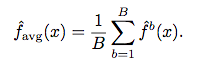

Obviamente, isto não é prático porque normalmente não temos acesso a múltiplos conjuntos de dados. Em vez disso, podemos utilizar bootstrap, pegando amostras repetidas do (único) conjunto de dados. Neste contexto geramos $B$ $bootstrapped$ conjuntos de dados de treino diferentes. Então, treinamos nosso método no b-ésimo bootstrapped conjunto de treino com o objetivo de obter $\hat{f}^{*b}$$(x)$, e finalmente calculamos a média de todas as predições para obter

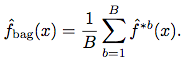

Isto é denominado $bagging$.

Como o bagging pode melhorar predições para muitos métodos de regressão, é particulamente útil para árvores de decisão. Para aplicar bagging à árvores de regressão, simplesmente construímos $B$ árvores de regressão utilizando $B$ conjuntos de treinos $bootstrapped$, e calculamos a média das predições resultantes. Estas árvores estão profundamente crescidas, mas não estão podadas. Logo, cada árvore individual possui variância alta, mas baixa polarização. Calcular a média destas $B$ árvores reduz a variância. A abordagem bagging causou melhoras expressivas na acurácia ao combinar centenas ou até milhares de árvores em um único procedimento. 

Até então, descrevemos o procedimento de bagging no contexto de regressão para prever uma variável quantitativa de saída $Y$. Como o bagging pode ser extendido para um problema de classificação onde Y é qualitativo? Nesta situação, há algumas abordagens possíveis, mas a mais simples é a seguinte. Para uma dada observação de teste, podemos gravar a classe prevista por cada uma das $B$ árvores, e fazer um $voto$ $majoritário$: a predição acima de todas é a mais recorrente entre as $B$ predições.  

A figura 8.8 mostra os resultados das árvores de bagging nos dados $Heart$. A taxa de erro de teste é mostrada como uma função de $B$, o número de árvores construídas utilizando conjuntos de dados de treino bootstrapped. Vemos que a taxa de erro de teste de bagging é sensivelmente menor neste caso do que no caso da taxa de teste de erro obtida de uma única árvore. O número de árvores $B$ não é um parâmetro crítico para o bagging; utilizar um valor muito grande de $B$ não levará à sobreajuste (overfitting). Na prática, utilizamos um valor de $B$ suficientemente grande tal que o erro se estabilize. Utilizar $B$ = 100 é suficiente para atingir uma boa performance neste exemplo. 

### Estimação do erro out-of-bag

Há uma maneira bastante direta de estimar o erro de teste de um modelo de bagging, sem a necessidade de realizar validação cruzada ou a abordagem de validação do conjunto. Relembre que a chave para o bagging é o fato das árvores se ajustarem repetidamente à subconjuntos bootstrapped das observações. Pode-se mostrar que, na média, cada árvore no bagging faz uso de aproximadamente dois terços das observações. O um terço remanescente das observações não utilizadas para ajustar uma árvore no bagging são denominadas como observações $out$-$of$-$pag$ (OOB). Podemos predizer a resposta para a i-ésima observação utilizando cada uma das árvores na qual cada observação foi OOB. Isto resulta em aproximadamente <sup>$B$</sup>&frasl;<sub>$3$</sub> predições para a i-ésima observação. Para obter uma única predição para a i-ésima observação, podemos calcular a média destas respostas preditas (se a regressão for o objetivo), ou podemos obter um voto majoritário (se o objetivo for a classificação). Isto leva à uma única predição OOB para a i-ésima observação. Uma predição OOB pode ser obtida desta forma para cada uma das $n$ observações, das quais o MSE do OOB geral (para um problema de regressão) ou o erro de classificação (para um problema de classificação) pode ser computado. O erro resultante da OOB é uma estimativa válida do erro de teste para o modelo com $bagging$, já que a resposta para cada observação é predita utilizando apenas as árvores que não foram ajustadas utilizando aquela observação. A figura 8.8 mostra o erro do OOB nos dados $Heart$. Pode ser mostrado que com $B$ suficientemente grande, o erro OOB é virtualmente equivalente ao erro leave-one-out da validação cruzada. A abordagem OOB para estimar o erro de teste é particularmente conveniente ao realizar bagging em grandes conjuntos de dados para o qual validação cruzada seria computacionalmente pesado.

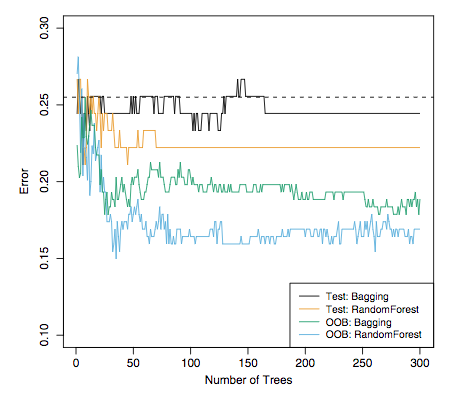
<h5>Figura 8.8</h5>
<i>Resultados do bagging e random forest para os dados $Heart$. O erro de teste (preto e laranja) é mostrado como uma função de B, o número de conjunto de treinos bootstrapped utilizado. Random forests foram utilizados com m = &radic;p. A linha tracejada indica o erro de teste resultante de uma única árvore de classificação. Os traços verde e azul mostram o erro OOB, o qual neste caso é consideravelmente menor.

### Medidas de importância de variável

Como discutimos, o bagging tipicamente resulta em uma melhora da acurácia sobre a predição utilizando uma única árvore. Infelizmente, no entanto, pode ser difícil interpretar o modelo resultante. Relembre que uma das vantagens das árvores de decisão são os diagramas resultantes atrativos e facilmente interpretados, tal como o mostrado na figura 8.1. No entanto, quando fazemos bagging em um grande número de árvores, não é mais possível representar o procedimento de aprendizado estatístico resultante utilizando uma única árvore, e não é mais claro quais variáveis são mais importantes para o procedimento. Portanto, o bagging melhora a acurácia da predição ao custo da interpretabilidade.

Apesar da coleção de árvores nas quais foram utilizadas bagging ser muito mais difícil de interpretar que uma única árvore, se pode obter um resumo geral da importância de cada preditor utilizando o RSS (para árvores de regressão de bagging) ou o índice de Gini (para árvores de classificação de bagging). No caso de árvores de regressão de bagging, podemos gravar a quantidade total na qual o RSS (8.1) decresce devido à divisão sobre um dado preditor, feita a média sobre todas as $B$ árvores. Um valor grande indica um preditor importante. Similarmente, no contexto das árvores de classificação de bagging, podemos adicionar o valor total no qual o índice de Gini (8.6) é diminuído ao se dividir sobre um dado preditor, feita a média sobre todas as $B$ árvores.

Uma representação gráfica das $importâncias$ $de$ $variável$ nos dados $Heart$ é mostrada na figura (8.9). É observada a diminuição da média no índice de Gini para cada variável, relativa à maior. As variáveis com maior diminuição da média no índice de Gini são $Thal$, $Ca$, e $ChestPain$. 

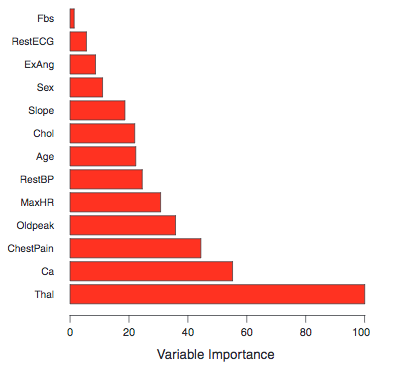
<h5>Figura 8.9</h5>
<i>Um gráfico de importância de variável para os dados $Heart$. A importância de variável é computada utilizando a diminuição da média no índice de Gini, e expressa relativo ao máximo. 

## 8.2.2 Random Forests

Random forests fornecem uma melhora em relação a árvores com bagging por meio de um pequeno "puxão" que $descorrelaciona$ as árvores. Como no bagging, construímos um número de árvores de decisão em amostras de treino com bootstrap. Mas, ao construir estas árvores de decisão, a cada vez em que uma divisão em uma árvore é considerada, uma $amostra$ $aleatória$ $de$ $m$ $preditores$ é escolhida como candidatos para divisão do conjunto completo de $p$ preditores. A divisão é permitida para usar apenas um dos $m$ preditores. Uma amostra fresca de $m$ preditores é utilizada em cada divisão, e tipicamente escolhemos $m$ = $≅$ &Sqrt;p $-$ isto é, o número de preditores considerado em cada divisão é aproximadamente igual à raiz quadrada do número total de preditores (4 dos 13 para os dados $Heart$).

Em outras palavras, ao construir uma random forest, em cada divisão na árvore, o algoritmo não é <i>permitido a considerar</i> a maioria dos preditores disponíveis. Pode soar estranho, mas é um raciocínio esperto. Suponha que há um preditor muito forte no conjunto de dados, juntamente com um número de outros preditores moderadamente fortes. Então, na coleção de árvores nas quais foram utilizadas o bagging, a maioria ou todas as árvores utilizarão este forte preditor na divisão do topo. Consequentemente, todas as árvores com bagging serão similares umas às outras. Logo, as predições destas árvores serão altamente correlacionadas. Infelizmente, calcular a média de quantidades altamente correlacionadas não leva a uma redução tão grande na variância. Em particular, isto significa que o bagging não levará a uma redução substancial na variância sobre uma única árvore neste contexto.

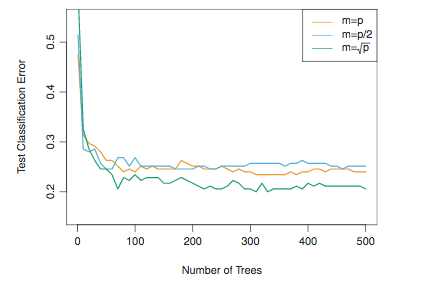
<h5>Figura 8.10.</h5>
<i>Resultados de random forests do conjunto de dados da expressão de gene de 15 classes com p = 500 preditores. O erro de teste é mostrado como uma função do número de árvores. Cada linha colorida corresponde a um valor diferente de m, o número de preditores disponível para divisão em cada nó interior da árvore. Random forests (m < p) levam a uma sensível melhora em relação ao bagging (m = p). Uma única árvore de classificação possui uma taxa de erro de 45,7%.</i>

Random forests superam este problema ao forçar cada divisão a considerar apenas um subconjunto dos preditores. Portanto, na média, <sup>$(p-m)$</sup>&frasl;<sub>$p$</sub> das divisões não considerarão o preditor forte, e então os outros preditores terão mais chance. Podemos pensar nesse processo como $descorrelacionamento$ das árvores, assim fazendo a média das árvores resultante serem menos variáveis e portanto mais confiáveis.

A principal diferença entre $bagging$ e $random$ $forests$ é a escolha do tamanho do subconjunto preditor $m$. Por exemplo, se um random forest é construído utilizando $m$ = $p$, então isto equivale simplesmente ao $bagging$. Nos dados $Heart$, random forests utilizando m = &Sqrt;p leva a uma redução em ambos o erro de teste e o erro OOB, se os compararmos com os do bagging. (Figura 8.8).

Utilizar um pequeno valor de $m$ ao construir uma random forest irá ser tipicamente útil quando tivermos um grande número de predições correlacionadas. Aplicamos random forests para um conjunto de dados biólogico altamente dimensional consistindo de medidas de expressão de 4718 genes medidos em amostras de tecidos de 49 pacientes. Há cerca de 20000 genes em humanos, e genes individuais possuem níveis diferentes de atividade, ou expressão, em células particulares, tecidos, e condições biológicas. Neste conjunto de dados, cada uma das amostras dos pacientes possui uma legenda quantitativa com 15 níveis diferentes: normal ou 1 dos 14 tipos diferentes de câncer. Nosso objetivo foi utilizar random forests para predizer o tipo de câncer baseado em 500 genes que possuem a maior variância no conjunto de dados. Nós dividimos aleatoriamente as observações em conjuntos de treino e de teste, e aplicamos random forests ao conjunto de treino para três valores diferentes do número de variáveis de divisão $m$. Os resultados são mostrados na Figura 8.10. A taxa de erro de uma única árvore é 45,7% e a taxa nula é de 75,4%. Nós vimos que utilizar 400 árvores é suficiente para dar uma boa performance, e que a escolha $m$ = &Sqrt;$p$ melhorou sensivelmente o erro de teste em relação ao bagging ($m$ = $p$) neste exemplo. Como no bagging, random forests não terão sobreajuste se aumentarmos B, então na prática utilizamos um valor de $B$ suficientemente grande para que a taxa de erro seja estabilizada.

## 8.2.3 Boosting

Agora discutiremos o $boosting$, outra abordagem para melhorar as predições resultantes de uma árvore de decisão. Como o bagging, o boosting é uma abordagem geral que pode ser aplicada a muitos métodos de aprendizado estatístico para regressão ou classificação. Aqui, restrigimos nossa discussão do boosting para o contexto de árvores de decisão.

Relembre que o bagging envolve a criação de cópias múltiplas do conjunto de dados original utilizando o bootstrap, ajustando uma árvore de decisão separada para cada cópia, e então combinando todas as árvores para criar um único modelo preditivo. Notavelmente, cada árvore é construída em um conjunto de dados com bootstrap, independentemente das outras árvores. O boosting funciona de uma fórmula similar, exceto que as árvores são crescidas $sequencialmente$: cada árvore é crescida utilizando informação de árvores crescidas anteriormente. O boosting não involve amostragem do bootstrap; em vez disso, cada árvore é ajustada em uma versão modificada do conjunto de dados original.

Considere primeiramente o contexto de regressão. Como o bagging, o boosting envolve a combinação de  um grande número de árvores de decisão, $\hat{f}^{1}$,...,$\hat{f}^{B}$. O boosting é descrito no Algoritmo 8.2.

Qual a ideia por trás deste procedimento? Ao contrário do ajuste de uma única árvore de decisão grande para os dados, o qual equivale a potecialmente um sobreajuste, a abordagem do boosting $aprende$ $vagarosamente$. Dado o modelo atual, ajustamos a árvore de decisão para os resíduos do modelo. Isto é, ajustamos uma árvore utilizando os resíduos atuais, em vez da saída $Y$, como a resposta. Então, adicionamos esta nova árvore de decisão na função ajustada com o objetivo de atualizar os resíduos. Cada uma destas árvores pode ser pequena, com apenas alguns nós terminais, determinados pelo parâmetro $d$ no algoritmo. Ao ajustar árvores pequenas aos resíduos, nós vagarosamente melhoramos $\hat{f}$ nas áreas em que a performance não é boa. O parâmetro de encurtamento &lambda; atrasa o processo mais ainda, aceitando mais e árvores diferentes para atacar os resíduos. Em geral, abordagens de aprendizado estatístico que $aprendem$ $vagarosamente$ tendem a ter uma boa performance. Note que no boosting, ao contrário do bagging, a construção de cada árvore depende fortemente nas árvores que já foram crescidas.

Acabamos de descrever o processo de boosting de árvores de regressão. As árvores de classificação de boosting trabalham em uma forma similar, mas de uma forma um pouco mais complexas, e os detalhes estão omitidos aqui.

O Boosting possui três parâmetros de afinação:

<b>1.</b> O número de árvores $B$. Ao contrário de bagging e random forests, o boosting pode sobreajustar se $B$ é muito grande, apesar deste sobreajuste tender a ocorrer vagarosamente. Utilizamos validação cruzada para selecionar $B$.

<b>2.</b> O parâmetro de encurtamento &lambda;, um pequeno número positivo. Isto controla a taxa na qual o boosting aprende. Típicos valores são 0,01 ou 0,001, e a escolha certa pode depender do problema. Um &lambda; muito pequeno pode pedir um valor bastante grande $B$ para alcançar uma boa performance.

<b>3.</b> O número $d$ de divisões em cada árvore, o qual controla a complexidade do conjunto no qual foi utilizado o boosting. Frequentemente, $d=1$ funciona bem, e no caso cada árvore é um $pedaço$, consistindo de uma única divisão. Neste caso, o conjunto "em que foi realizado boosting" está ajustando um modelo aditivo, já que cada termo envolve apenas uma única variável. Generalizando, $d$ é a $profundidade$ $da$ $interação$, e controla a ordem de interação do modelo em que foi realizado boosting, já que $d$ divisões podem envolver no máximo $d$ variáveis.

#### Algoritmo 8.2    <i>Boosting para árvores de regressão</i>

<b>1.</b> Estabeleça $\hat{f}(x)=0$ e $r_{i}$ = $y_{i}$ para todo $i$ no conjunto de treino.

<b>2.</b> Para $b=1,2,...,B$, repita:

<b>(a)</b> Ajuste uma árvore $\hat{f}^{b}$ com $d$ divisões (d + 1 nós terminais) aos dados de treino $(X,r)$.

<b>(b)</b> Atualize $\hat{f}$ ao adicionar uma versão encolhida da nova árvore:
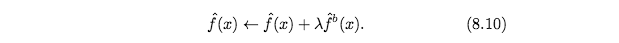

<b>(c)</b> Atualize os resíduos,
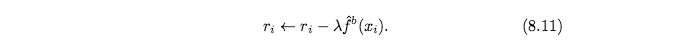

<b>3</b> Retorne o modelo com boosting,
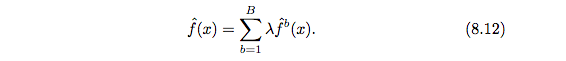

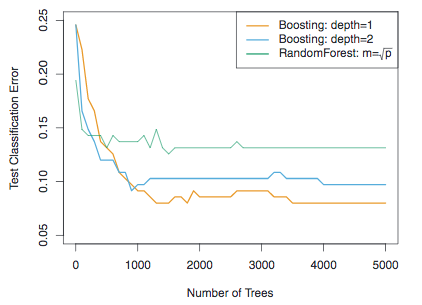
<h5>Figura 8.11.</h5>
<i>Resultados da performance de boosting e random forests no conjuntos de dados da expressão de um gene de 15 classes com o objetivo de predizer</i> cancer <i>x</i> normal. <i>O erro de teste é mostrado como uma função do número de árvores. Para os dois modelos em que foi realizado boosting, &lambda; = 0,01. Árvores com profundidade 1 possuem performance melhor que as com profundidade 2, e ambas possuem melhor performance que o random forest, apesar dos erros padrões serem em torno de 0,02, fazendo estas diferenças serem insignificantes. A taxa de erro de teste para uma única árvore é de 24%.</i>

Na Figura 8.11, aplicamos o boosting ao conjunto de dados da expressão de um gene de 15 classes, com o objetivo de desenvolver um classificador que pudesse distinguir a classe normal das 14 classes de câncer. Apresentamos o erro de teste como uma função do número total de árvores e da profundidade de interação $d$. Vemos que pedaços simples com uma profundidade de interação 1 possuem boa performance se há uma quantidade suficiente deles inlcusos. Este modelo possui performance melhor que o de profundidade 2, e ambos possuem melhor performance que um random forest. Isso realça uma diferença entre boosting e random forests: no boosting, devido ao fato do crescimento de uma árvore particular levar em consideração as outras árvores que já foram crescidas, árvores menores são tipicamentes suficientes. Utilizar árvores menores podem melhorar a interpretabilidade; por exemplo, utilizar pedaços leva a um modelo aditivo. 

## 8.3 Laboratório: Árvores de decisão

### 8.3.1 Ajustando árvores de classificação

Primeiramente, utilizaremos o dataset <i>Carseats</i> para ajustar uma árvore de classificação.

In [110]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

carseats = pd.read_csv('Carseats.csv')

carseats.shape

(400, 12)

Em seguida, criamos uma variável, chamada <i>High</i>, que assume o valor <i>Sim</i> se a variável <i>Sales</i> excede 8, caso contrário, assume o valor <i>Não</i>.
Daí, fundimos o dataset <i>High</i> com o resto do dataset <i>Carseats</i>.

In [4]:

carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})


In [5]:
le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

x = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [6]:
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical) #Estas colunas são as colunas com valores 
                                                                            #categóricos do dataset

Agora, vamos transformar os valores categóricos das colunas em valores numéricos com o $LabelEncoder$:

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder() #Converte valores categóricos em numéricos
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

x = carseats.loc[:, 'CompPrice':'US'] #indexador para seleção por legenda (coluna). Aqui, utilizaremos todas as colunas
                                     #do dataset, exceto pela "Sales"
y = carseats.loc[:, 'High']          #aqui, utilizaremos apenas a coluna "High" do dataset      


Utilizaremos a classe $DecisionTreeClassifier$ para realizar uma tarefa de classificação. Em seguida, utilizamos o método $fit$ para treinar o algoritmo. Para fazer predições, o método $predict$ da classe $DecisionTreeClassifier$ é utilizado:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, test_size=0.5, random_state=42)

tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(x_train, y_train)
y_pred = tree_carseats_tt.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.81      0.71      0.75       117
        Yes       0.65      0.76      0.70        83

avg / total       0.74      0.73      0.73       200



In [9]:
print(confusion_matrix(y_test,y_pred))

[[83 34]
 [20 63]]


Acima, avaliamos o quão preciso nosso algoritmo é por meio dos métodos <i>classification_report</i> e <i>confusion_matrix</i>.

Agora, temos a imagem da nossa árvore de decisão (podemos visualizá-la no site http://www.webgraphviz.com):

In [10]:
from sklearn import tree

_= tree.export_graphviz(tree_carseats_tt,out_file = "tree.dot")

### 8.3.2 Ajustando árvores de regressão

Agora, ajustaremos uma árvore de regressão ao conjunto de dados <i>Boston</i>. Primeiramente, criamos um conjunto de treino, e ajustamos a árvore aos dados de treino. Utilizaremos a biblioteca <i>scikit-learn</i>.

In [11]:
from sklearn.tree import DecisionTreeRegressor

boston = pd.read_csv("Boston.csv")

In [12]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Na regressão, utilizaremos em <i>x</i> todas as colunas exceto <i>medv</i>, e em <i>y</i> apenas <i>medv</i>.

In [13]:
x1 = boston.loc[:,'crim':'lstat']
y1 = boston.loc[:,'medv']


Agora, dividimos dados em conjuntos de treino e teste, com 50% do tamanho para o conjunto de teste com o método <i>train_test_split</i>.

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,train_size = 0.5, test_size = 0.5, random_state = 42)

Agora, para treinar a árvore, utilizaremos <i>DecisionTreeRegressor</i> (regressor de árvore de decisão) e chamaremos o método <i>fit</i>.

from sklearn.tree import DecisionTreeRegressor

In [15]:
regressor = DecisionTreeRegressor(min_samples_leaf = 5, max_depth = 2)

In [16]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Para fazer predições no conjunto de teste, utilizaremos o método <i>predict</i>:

In [17]:
y_predic = regressor.predict(X_test)

In [18]:
regressor.score(X_train,Y_train)

0.7461422238084277

In [19]:
regressor.score(X_test,Y_test)

0.6349503884695384

Agora, vamos comparar alguns dos valores preditos e os valores reais:

In [20]:
df= pd.DataFrame({'Actual':Y_test, 'Predicted':y_predic})  
df  

,Actual,Predicted
173,23.6,23.333858
274,32.4,23.333858
491,13.6,14.858621
72,22.8,23.333858
452,16.1,14.858621
76,20.0,23.333858
316,17.8,14.858621
140,14.0,14.858621
471,19.6,23.333858
500,16.8,23.333858


Utilizaremos o erro absoluto médio, o erro quadrático médio e a raiz do erro quadrático médio para avaliar a performance do algoritmo de regressão por meio do pacote <i>metrics</i>:

In [21]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_predic))

print('Mean Squared Error:',metrics.mean_squared_error(Y_test,y_predic))

print('Root mean squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_predic)))

Mean Absolute Error: 3.664817893267048
Mean Squared Error: 29.616571536918574
Root mean squared Error: 5.442110944929235


Em outras palavras, o MSE (erro quadrático médio) do conjunto de teste associado à árvore de regressão é 29,61. A raiz quadrada do MSE está em torno de 5,44, indicando que este modelo leva a predições de teste que estão em torno de $5440 do verdadeiro valor mediano de uma casa para o subúrbio.

Agora, teremos a imagem de nossa árvore de regressão:

In [22]:
from sklearn import tree

tree.export_graphviz(regressor,out_file='regressor.dot')

### 8.3.3 Bagging e Random Forests

#### Bagging

Aqui, aplicaremos <i>bagging</i> e <i>random forests</i> aos dados $Boston$. Relembre que <i>bagging</i> é simplesmente um caso especial de random forest com $m$ = $p$. 

In [59]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

O argumento <i>max_features</i> = 13 indica que todos os 13 preditores devem ser considerados em cada divisão da árvore - em outras palavras, que o $bagging$ deve ser realizado. O argumento <i>random_state</i> é utilizado para fixar os valores</i>.

In [60]:
boston_bag = RandomForestRegressor(max_features = 13,random_state = 42)

boston_bag.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [61]:
Y1_pred = boston_bag.predict(X_test)

In [62]:
mean_squared_error(Y_test,Y1_pred)

17.08816758893281

O MSE de teste associado com a árvore de regressão com bagging é 17,08. 

#### Random Forests

In [179]:
boston_randomforest = RandomForestRegressor(max_features = 6,n_estimators = 100,random_state = 42)

boston_randomforest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [180]:
Y2_pred = boston_randomforest.predict(X_test)

In [181]:
mean_squared_error(Y_test,Y2_pred)

13.358543695652173

O MSE do conjunto de teste é 13,36; isto indica que random forests tiveram uma performance melhor que o bagging neste caso. 

Podemos visualizar a importância de cada variável: 

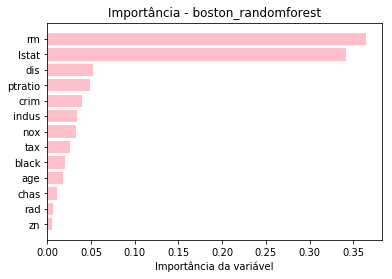

In [269]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

features = X_test.columns
importances = boston_randomforest.feature_importances_

indices = np.argsort(importances)

plt.title('Importância - boston_randomforest')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância da variável')
plt.show()

### 8.3.4 Boosting

Agora, utilizaremos o <i>Boosting</i>. Utilizaremos o Gradient Boosting para a regressão.
O <i>learning_rate</i> é o parâmetro de encurtamento dado em (8.10). Queremos 5000 árvores (<i>n_estimators</i>), e o <i>max_depth</i> limita a profundidade de cada árvore.

In [256]:
from sklearn.ensemble import GradientBoostingRegressor

In [257]:
boston_boosting = GradientBoostingRegressor(n_estimators = 5000,max_depth = 4,learning_rate = 0.2,
                                            random_state = 42)

boston_boosting.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [258]:
Y3_pred = boston_boosting.predict(X_test)

In [259]:
mean_squared_error(Y_test,Y3_pred)

15.24949266884432

Aqui, visualizamos a importância de cada variável. Vemos que $lstat$ e $rm$ são as variáveis mais importantes.

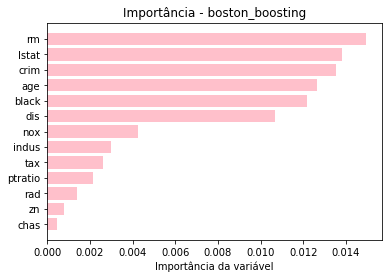

In [270]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

features = X_test.columns
importances = boston_boosting.feature_importances_

indices = np.argsort(importances)

plt.title('Importância - boston_boosting')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância da variável')
plt.show()

Podemos produzir <i>gráficos de dependência parcial</i> para as variáveis mais importantes ($lstat$ e $rm$, colunas 5 e 12). Estes gráficos ilustram o efeito marginal das variáveis selecionadas na resposta após retirar a integração das outras variáveis. Neste caso, como podemos esperar, os preços medianos de casas aumentam com $rm$ e diminuem com $lstat$.

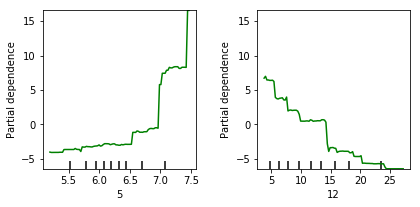

In [268]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig,axs = plot_partial_dependence(boston_boosting,X_test,[5,12])